## Imports
All the necessary libraries
- tensorflow (tf)
    - a machine learning framework
- PIL (Python Image Library) 
    - to look at images easily
- Numpy (np)
    - convert images to matrices and other math functions
- keras
    - high level API to interface with tf and perform ML tasks
- Matplotlib
    - to plot relevant data and show images
- Technically Jupyter Notebook
    - enabled live scripting for easy coding and testing


data:
https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-of-images


In [2]:
from PIL import Image
import tensorflow as tf
from keras import Sequential, layers
import keras
import os
import matplotlib.pyplot as plt
import numpy as np



## Preproccessing

convert all images to 224px x 224px
using keras we split the data into a training dataset and validating dataset
**this is important as we can not test on data we trained the model with**

The bottom code is just to show the images while I was writing the code


Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


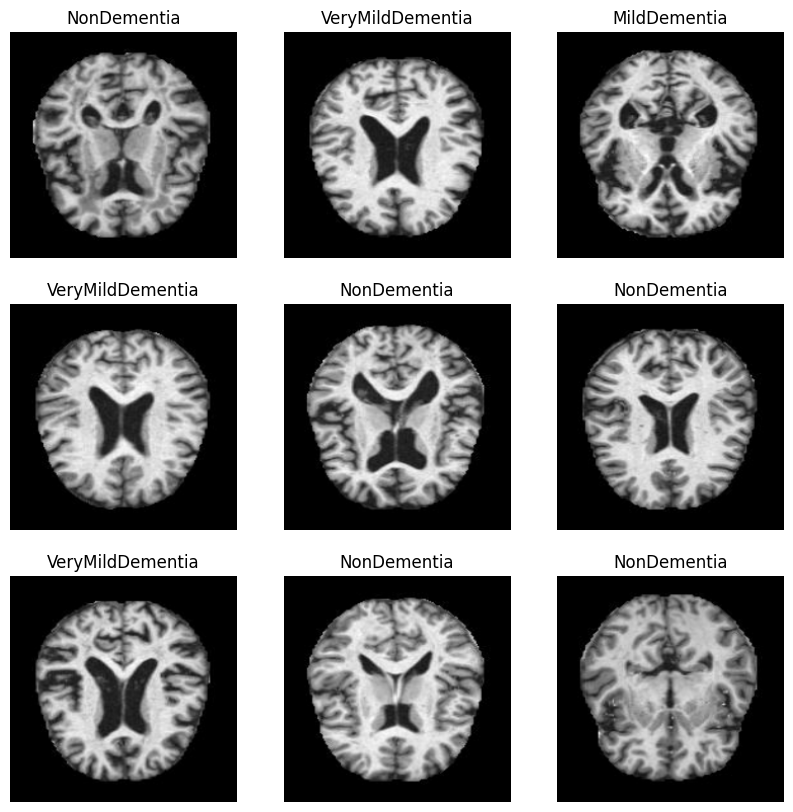

In [15]:
img_size = (224,224)

train_ds = keras.utils.image_dataset_from_directory(
    directory='Alzheimer_s Dataset/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=img_size)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='Alzheimer_s Dataset/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=img_size)

# batch_1=train_ds.take(1)

class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
train_ds.class_names = class_names
validation_ds.class_names = class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_ds.class_names[list(labels[i].numpy()).index(1)])
    plt.axis("off")

In [ ]:
We normalize the data to 0-1 from 0-255

In [ ]:
class_names = train_ds.class_names
print(class_names)

normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


## Defining the Model

here we utilize MobileNet as a base architecture and use imagenet weights as a good starting point.

then we define a keras model which takes the 1000 classes from mobilenet and cuts it down to 4 which represent our 4 classes

input: resized images --- MobileNet w imagenet weights --> 1000 classes --- Dense layer --> our 4 classes

In [ ]:
num_classes = len(class_names)

model_MN = tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model_MN.trainable = False

model = keras.Sequential([
  # layers.Rescaling(1./255, input_shape=(176, 208, 3)),
  # layers.Conv2D(16, (3,3),1, padding='same', activation='relu', input_shape=(176, 208, 3)),
  # layers.MaxPooling2D(),
  # layers.Conv2D(32, (3,3),1, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Conv2D(16, (3,3),1, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Flatten(),
  # layers.Dense(128, activation='relu'),
    model_MN,
  layers.Dense(num_classes)
])

model.build(img_size)


here im just compiling the model

idk what adam optimization and loss is

In [ ]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

epochs is how many times the model trains on every image in the training set

and then I fit the network to the training set

epochs=2
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)



In [ ]:
print("Evaluate on test data")
results = model.evaluate(validation_ds, batch_size=128)
print("test loss, test acc:", results)

In [ ]:

img_path = "Alzheimer_s Dataset/test/ModerateDemented/27.jpg"
img = Image.open(img_path)
# img_size
img_resized = img.resize(img_size)
np_img = np.asarray(img_resized)

In [ ]:
predictions = model.predict(np.asarray(img_resized))